In [1]:
import pandas as pd

file_path = r"C:\Users\USER\Downloads\Python_SalesData.xlsx"

df_raw = pd.read_excel(file_path, header=None)  # don’t assign headers
print(df_raw.head(10))

    0         1                    2                   3      4           5  \
0 NaN       NaN                  NaN                 NaN    NaN         NaN   
1 NaN  Order ID                 Date             Product  Price    Quantity   
2 NaN     10452  2022-11-07 00:00:00               Fries   3.49  573.065903   
3 NaN     10453  2022-11-07 00:00:00           Beverages   2.95  745.762712   
4 NaN     10454  2022-11-07 00:00:00       Sides & Other   4.99  200.400802   
5 NaN     10455  2022-11-08 00:00:00             Burgers  12.99  569.668976   
6 NaN     10456  2022-11-08 00:00:00  Chicken Sandwiches   9.95  201.005025   
7 NaN     10457  2022-11-08 00:00:00               Fries   3.49  573.065903   
8 NaN     10459  2022-11-08 00:00:00       Sides & Other   4.99  200.400802   
9 NaN     10460  2022-11-09 00:00:00             Burgers  12.99  554.272517   

               6               7                   8       9  
0            NaN             NaN                 NaN     NaN  
1  P

In [3]:
import pandas as pd

file_path = r"C:\Users\USER\Downloads\Python_SalesData.xlsx"

# Read with correct header row (row 2 in Excel = index 1)
df = pd.read_excel(file_path, header=1)

In [4]:
# Drop unnamed columns (the first column is just an index placeholder)
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col])

# Clean column names
df.columns = df.columns.str.strip()

# Convert datatypes
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")

# Create Revenue column
df["Revenue"] = df["Price"] * df["Quantity"]

print("✅ Cleaned Data:")
print(df.head())
print("\nColumns:", df.columns.tolist())


✅ Cleaned Data:
   Order ID       Date             Product  Price    Quantity Purchase Type  \
0     10452 2022-11-07               Fries   3.49  573.065903       Online    
1     10453 2022-11-07           Beverages   2.95  745.762712       Online    
2     10454 2022-11-07       Sides & Other   4.99  200.400802     In-store    
3     10455 2022-11-08             Burgers  12.99  569.668976     In-store    
4     10456 2022-11-08  Chicken Sandwiches   9.95  201.005025     In-store    

  Payment Method             Manager    City  Revenue  
0      Gift Card    Tom      Jackson  London   2000.0  
1      Gift Card         Pablo Perez  Madrid   2200.0  
2      Gift Card       Joao    Silva  Lisbon   1000.0  
3    Credit Card       Walter Muller  Berlin   7400.0  
4    Credit Card       Walter Muller  Berlin   2000.0  

Columns: ['Order ID', 'Date', 'Product', 'Price', 'Quantity', 'Purchase Type', 'Payment Method', 'Manager', 'City', 'Revenue']


In [5]:
# 1. Most Preferred Payment Method
preferred_payment = df["Payment Method"].value_counts().idxmax()
print(f"Q1: Most Preferred Payment Method = {preferred_payment}")

Q1: Most Preferred Payment Method =  Credit Card


In [6]:
# 2. Most Selling Product by Quantity and Revenue
top_product_qty = df.groupby("Product")["Quantity"].sum().sort_values(ascending=False).head(1)
top_product_rev = df.groupby("Product")["Revenue"].sum().sort_values(ascending=False).head(1)
print(f"\nQ2: Most Selling Product by Quantity:\n{top_product_qty}")
print(f"Q2: Most Selling Product by Revenue:\n{top_product_rev}")


Q2: Most Selling Product by Quantity:
Product
Beverages    34983.050847
Name: Quantity, dtype: float64
Q2: Most Selling Product by Revenue:
Product
Burgers    377000.0
Name: Revenue, dtype: float64


In [7]:
# 3. City with Maximum Revenue & Manager with Maximum Revenue
city_max_revenue = df.groupby("City")["Revenue"].sum().idxmax()
manager_max_revenue = df.groupby("Manager")["Revenue"].sum().idxmax()
print(f"\nQ3: City with Maximum Revenue = {city_max_revenue}")
print(f"Q3: Manager with Maximum Revenue = {manager_max_revenue}")


Q3: City with Maximum Revenue = Lisbon
Q3: Manager with Maximum Revenue = Joao Silva


In [8]:
# 4. Average Revenue
avg_revenue = df["Revenue"].mean()
print(f"\nQ4: Average Revenue = {avg_revenue:.2f}")


Q4: Average Revenue = 3029.58


In [9]:
# 5. Average Revenue of November & December
df["Month"] = df["Date"].dt.month
nov_dec_avg = df[df["Month"].isin([11, 12])]["Revenue"].mean()
print(f"\nQ5: Average Revenue of November & December = {nov_dec_avg:.2f}")


Q5: Average Revenue of November & December = 3029.58


In [10]:
# 6. Standard Deviation of Revenue and Quantity
std_revenue = df["Revenue"].std()
std_quantity = df["Quantity"].std()
print(f"\nQ6: Std Dev of Revenue = {std_revenue:.2f}, Quantity = {std_quantity:.2f}")


Q6: Std Dev of Revenue = 2420.12, Quantity = 214.89


In [11]:
# 7. Variance of Revenue and Quantity
var_revenue = df["Revenue"].var()
var_quantity = df["Quantity"].var()
print(f"\nQ7: Variance of Revenue = {var_revenue:.2f}, Quantity = {var_quantity:.2f}")


Q7: Variance of Revenue = 5857001.11, Quantity = 46177.52


In [12]:
# 8. Revenue trend over time (increasing or decreasing)
revenue_trend = df.groupby("Date")["Revenue"].sum().reset_index()
trend = "increasing 📈" if revenue_trend["Revenue"].iloc[-1] > revenue_trend["Revenue"].iloc[0] else "decreasing 📉"
print(f"\nQ8: Revenue trend over time = {trend}")


Q8: Revenue trend over time = increasing 📈


In [13]:
# 9. Average Quantity Sold & Average Revenue per Product
avg_per_product = df.groupby("Product")[["Quantity", "Revenue"]].mean()
print(f"\nQ9: Average Quantity & Revenue per Product:\n{avg_per_product}")


Q9: Average Quantity & Revenue per Product:
                      Quantity      Revenue
Product                                    
Beverages           699.661017  2064.000000
Burgers             558.121632  7250.000000
Chicken Sandwiches  214.147661  2204.599923
Fries               628.125176  2464.205854
Sides & Other       200.400802  1000.000000


In [14]:
# 10. Total number of orders/sales
total_orders = len(df)
print(f"\nQ10: Total number of orders/sales = {total_orders}")


Q10: Total number of orders/sales = 254


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\USER\Downloads\Python_SalesData.xlsx"


In [16]:
# Load clean dataset
df = pd.read_excel(file_path, header=1)
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col])
df.columns = df.columns.str.strip()

# Convert datatypes
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")

# Create Revenue column
df["Revenue"] = df["Price"] * df["Quantity"]

Q1: Most Preferred Payment Method =  Credit Card


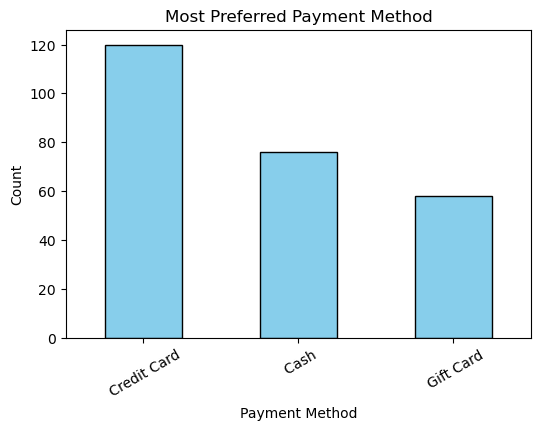

In [17]:
# 1. Most Preferred Payment Method
payment_counts = df["Payment Method"].value_counts()
preferred_payment = payment_counts.idxmax()
print(f"Q1: Most Preferred Payment Method = {preferred_payment}")

plt.figure(figsize=(6,4))
payment_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Most Preferred Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()


Q2: Top Product by Quantity:
Product
Beverages    34983.050847
Name: Quantity, dtype: float64
Q2: Top Product by Revenue:
Product
Burgers    377000.0
Name: Revenue, dtype: float64


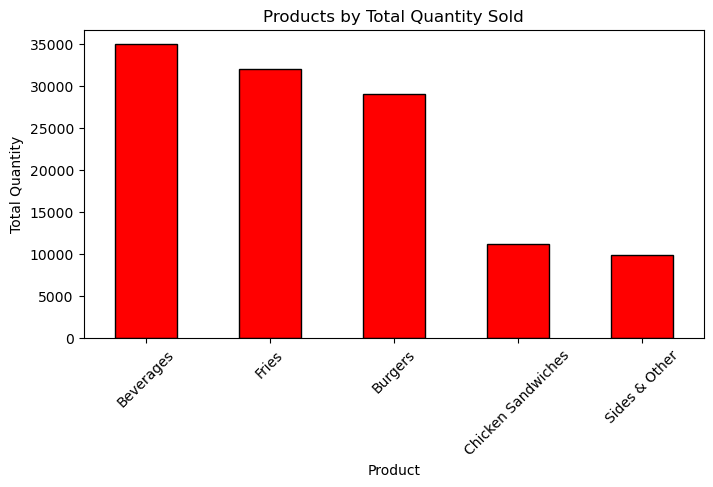

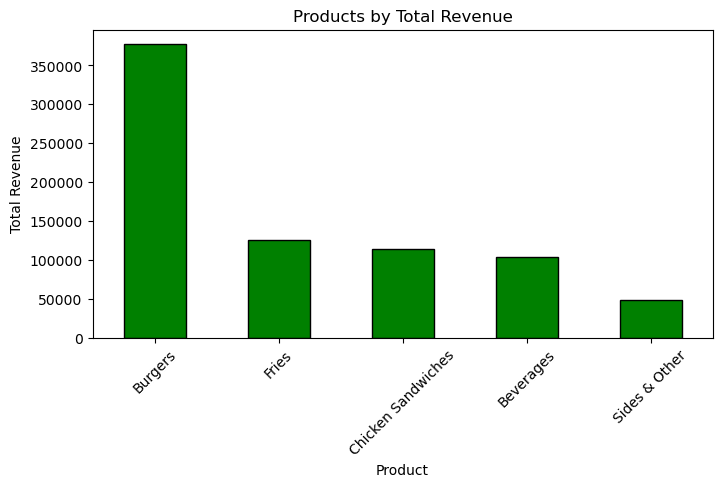

In [19]:
# 2. Most Selling Product by Quantity and Revenue
top_qty = df.groupby("Product")["Quantity"].sum().sort_values(ascending=False)
top_rev = df.groupby("Product")["Revenue"].sum().sort_values(ascending=False)

print(f"\nQ2: Top Product by Quantity:\n{top_qty.head(1)}")
print(f"Q2: Top Product by Revenue:\n{top_rev.head(1)}")

plt.figure(figsize=(8,4))
top_qty.plot(kind="bar", color="red", edgecolor="black")
plt.title("Products by Total Quantity Sold")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,4))
top_rev.plot(kind="bar", color="green", edgecolor="black")
plt.title("Products by Total Revenue")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()



Q3: City with Maximum Revenue = Lisbon
Q3: Manager with Maximum Revenue = Joao Silva


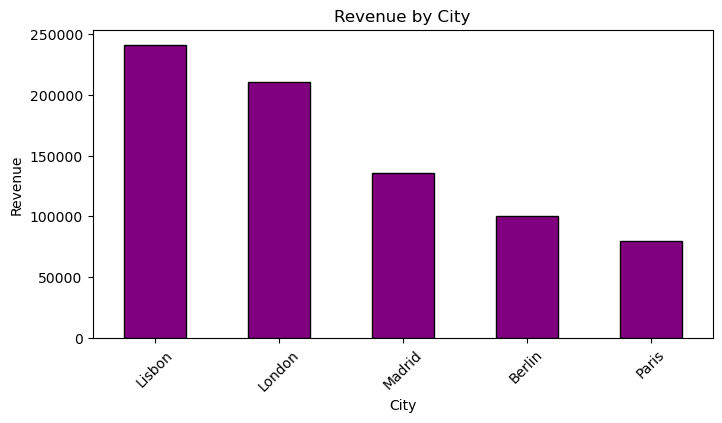

In [20]:
# 3. City & Manager with Maximum Revenue
city_rev = df.groupby("City")["Revenue"].sum().sort_values(ascending=False)
manager_rev = df.groupby("Manager")["Revenue"].sum().sort_values(ascending=False)

city_max_revenue = city_rev.idxmax()
manager_max_revenue = manager_rev.idxmax()

print(f"\nQ3: City with Maximum Revenue = {city_max_revenue}")
print(f"Q3: Manager with Maximum Revenue = {manager_max_revenue}")

plt.figure(figsize=(8,4))
city_rev.plot(kind="bar", color="purple", edgecolor="black")
plt.title("Revenue by City")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()



Q8: Revenue trend over time = increasing 📈


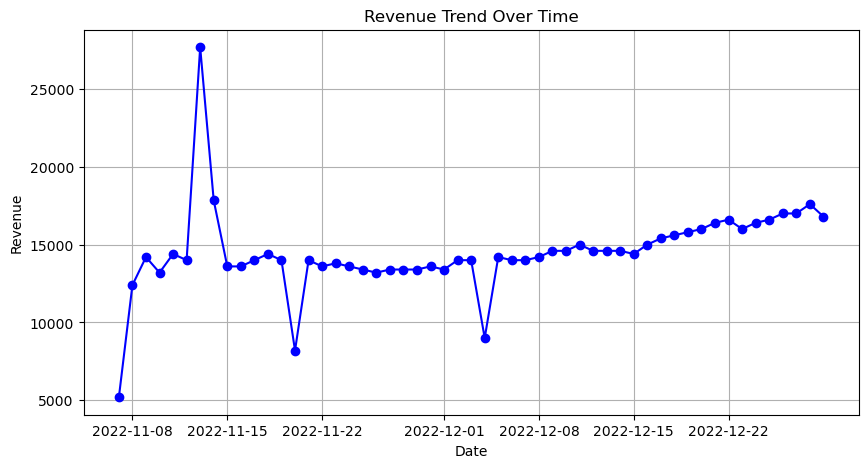

In [24]:
# 8. Revenue trend over time
revenue_trend = df.groupby("Date")["Revenue"].sum().reset_index()
trend = "increasing 📈" if revenue_trend["Revenue"].iloc[-1] > revenue_trend["Revenue"].iloc[0] else "decreasing 📉"
print(f"\nQ8: Revenue trend over time = {trend}")

plt.figure(figsize=(10,5))
plt.plot(revenue_trend["Date"], revenue_trend["Revenue"], marker="o", color="blue")
plt.title("Revenue Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()
